# Exploratory Data Analysis - Week 3

Refactored code from Week 3 of WiMLDS Data Science Lab

In [1]:
# imports and magic line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from emissionscheck_alb import data_prep

## Read data `sample.csv`

In [2]:
df = pd.read_csv("../data/interim/sample.csv", lineterminator='\n')

/home/mdado/anaconda3/envs/dslab/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,7,18,26,108,109,113) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# get columns for data exploration
df_subset = df[["RecordID", "TEST_SDATE", "TEST_EDATE", "ODOMETER", "VEHICLE_TYPE", "MODEL_YEAR", "FUEL_TYPE", "GVW_TYPE", "OVERALL_RESULT"]]

## Create new column `CAR_AGE`

In [4]:
# get car age
df_subset = data_prep.get_car_age(df_subset)
df_subset.head()

,RecordID,TEST_SDATE,TEST_EDATE,ODOMETER,VEHICLE_TYPE,MODEL_YEAR,FUEL_TYPE,GVW_TYPE,OVERALL_RESULT,CAR_AGE
0,111260,2004-12-16 10:57:00,2004-12-16 11:03:00,53274,3,1994,G,1.0,P,11
1,138031,2004-08-13 14:10:00,2004-08-13 14:12:00,109225,1,2000,G,1.0,P,5
2,298121,2004-08-31 13:03:00,2004-08-31 13:03:00,110347,1,1989,G,1.0,A,16
3,369185,2004-12-02 11:33:00,2004-12-02 11:39:00,152121,4,1985,G,2.0,P,20
4,384955,2004-12-29 17:00:00,2004-12-29 17:03:00,135640,1,1997,G,1.0,P,8


## Keep only pass-fails

In [5]:
# how many rows?
num_rows_orig = df_subset.shape[0]

In [6]:
# Keep rows with only P or F in OVERALL RESULT
df_subset = data_prep.keep_pass_fail(df_subset)

In [7]:
# how many rows after removal of non-pass/fail result?
num_rows_passfail = df_subset.shape[0]

# how many of original rows remain?
print("Remaining rows %: ", round((num_rows_passfail / num_rows_orig) * 100, 2))

Remaining rows %:  92.35


## Visualizations of features

### Fuel Type

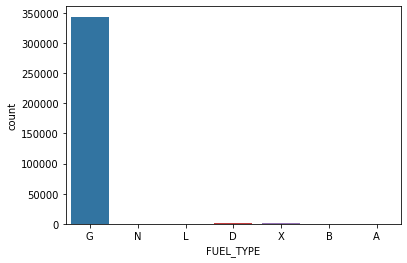

In [8]:
sns.countplot(df_subset["FUEL_TYPE"])

### Gross Vehicle Weight

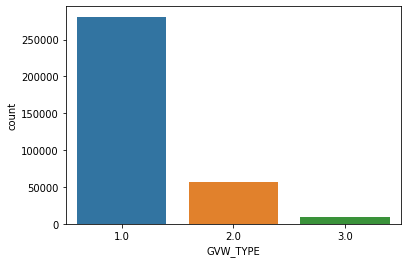

In [9]:
sns.countplot(df_subset["GVW_TYPE"])

### Car age

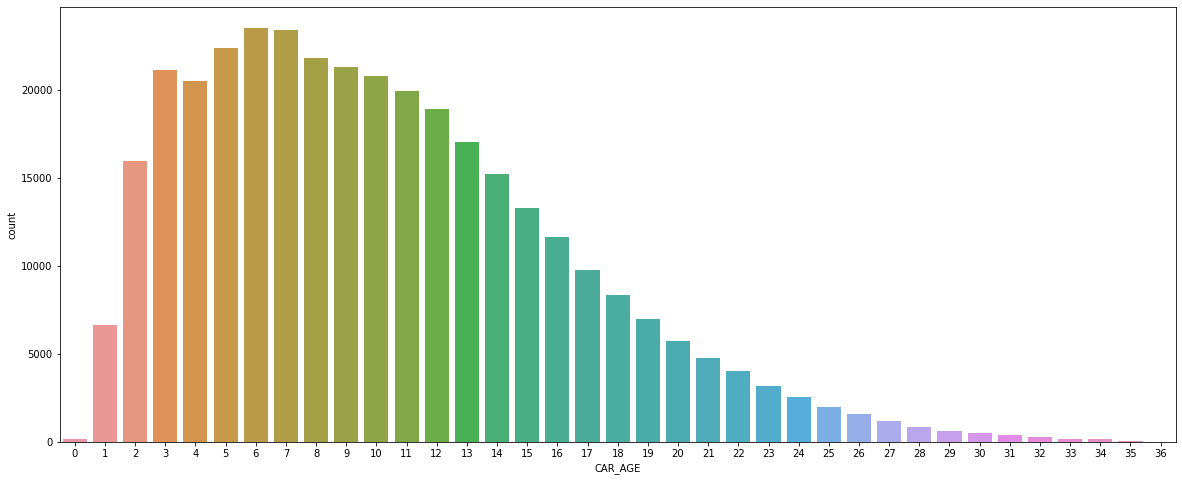

In [10]:
fig, ax = plt.subplots(figsize=[20,8])
sns.countplot(df_subset["CAR_AGE"])

### Vehicle Type

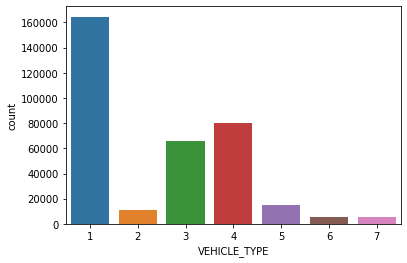

In [11]:
sns.countplot(df_subset["VEHICLE_TYPE"])

### Odometer

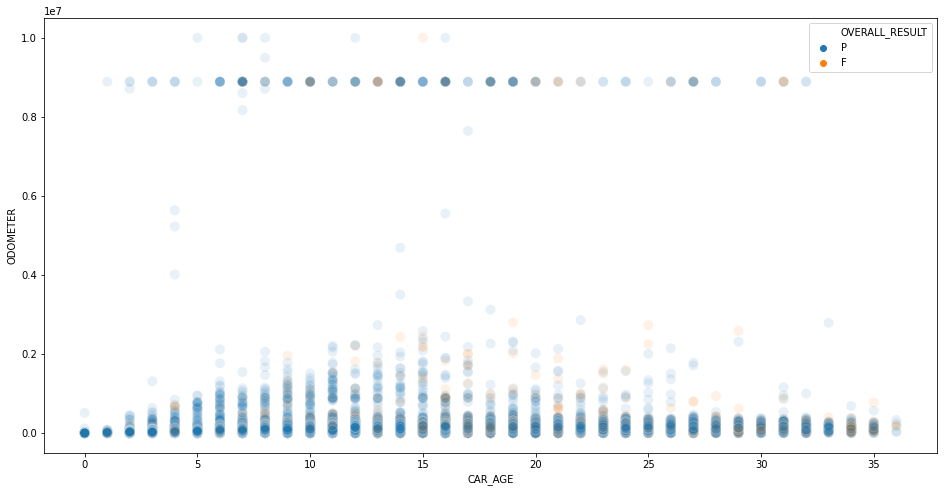

In [12]:
fig, ax = plt.subplots(figsize=[16,8])
sns.scatterplot(data=df_subset, x='CAR_AGE', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.1)

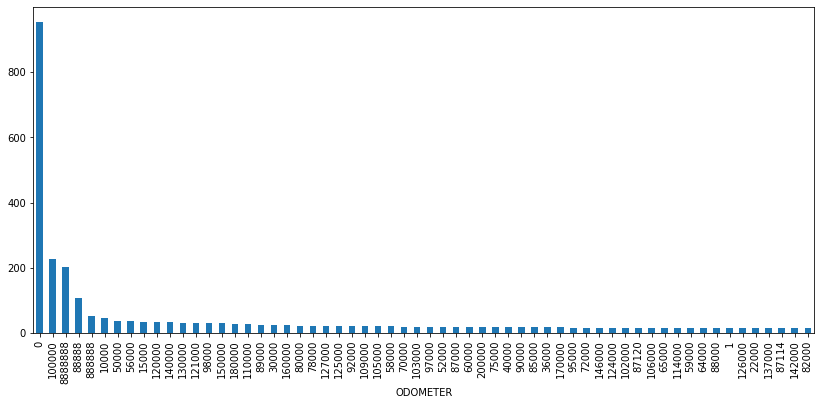

In [13]:
fig, ax = plt.subplots(figsize=(14,6))
df_subset.groupby('ODOMETER').size().sort_values(ascending=False).head(60).plot.bar()

In [14]:
df['MECHANIC_LAST_NAME'] = df.MECHANIC_LAST_NAME.str.title()
df['MECHANIC_FIRST_NAME'] = df.MECHANIC_FIRST_NAME.str.title()

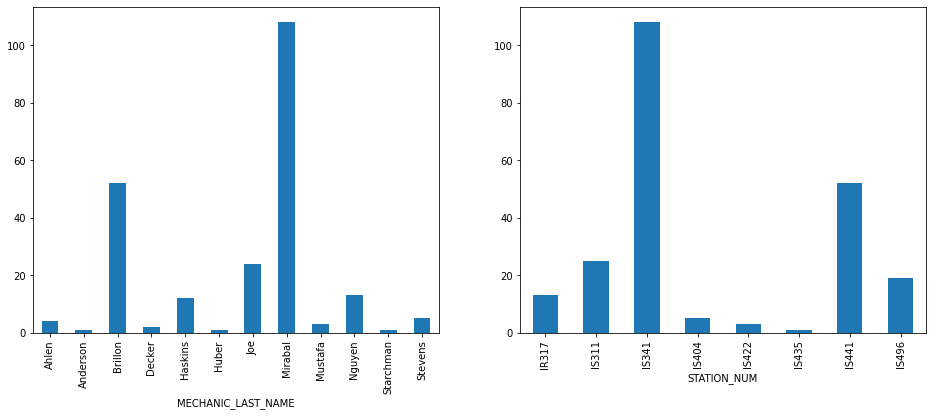

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
df[df.ODOMETER == 8888888].groupby('MECHANIC_LAST_NAME').size().plot.bar(ax=axs[0])
df[df.ODOMETER == 8888888].groupby('STATION_NUM').size().plot.bar(ax=axs[1])

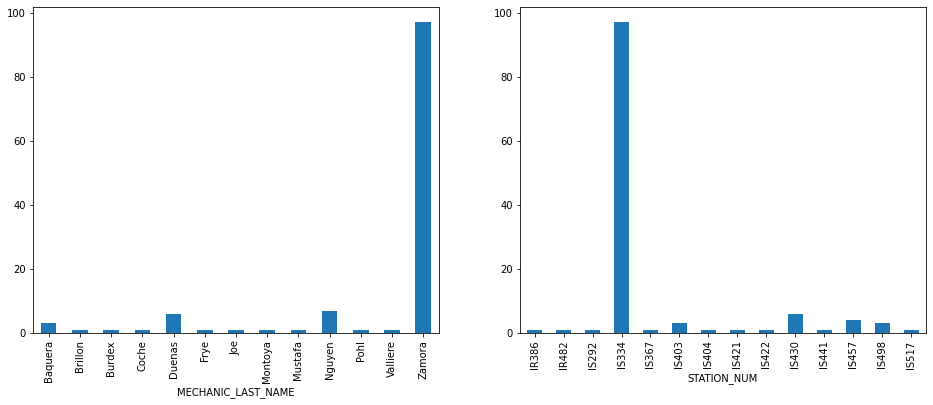

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
df[df.ODOMETER == 88888].groupby('MECHANIC_LAST_NAME').size().plot.bar(ax=axs[0])
df[df.ODOMETER == 88888].groupby('STATION_NUM').size().plot.bar(ax=axs[1])

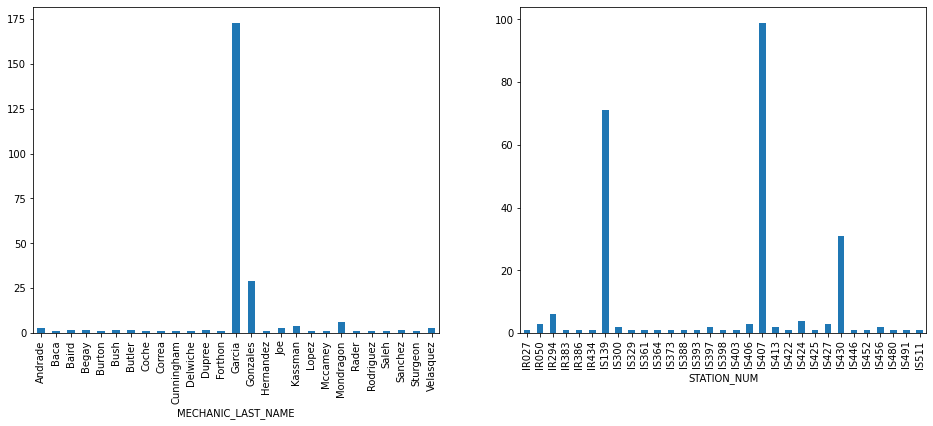

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
df[df.ODOMETER == 100000].groupby('MECHANIC_LAST_NAME').size().plot.bar(ax=axs[0])
df[df.ODOMETER == 100000].groupby('STATION_NUM').size().plot.bar(ax=axs[1])

### Exploring `ODOMETER`'s extreme values with other features

Values over 400,000 miles

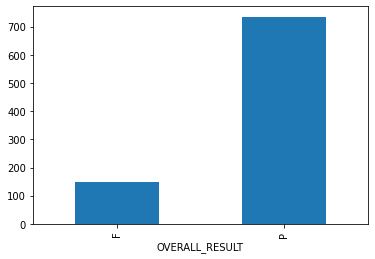

In [18]:
# rows with extreme values in ODOMETER
df_subset[df_subset.ODOMETER >= 400000].groupby('OVERALL_RESULT').size().plot.bar()

#### Odometer and fuel type

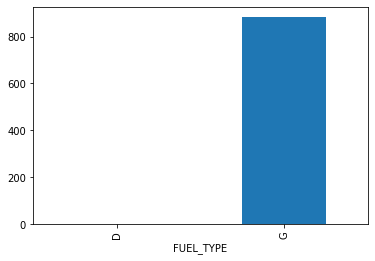

In [19]:
df_subset[df_subset.ODOMETER >= 400000].groupby('FUEL_TYPE').size().plot.bar()

#### Odometer and GVW

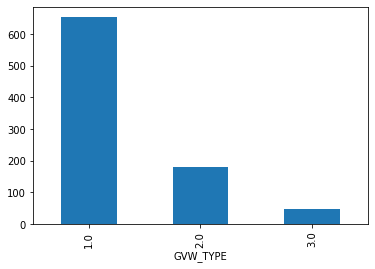

In [20]:
df_subset[df_subset.ODOMETER >= 400000].groupby('GVW_TYPE').size().plot.bar()

/home/mdado/anaconda3/envs/dslab/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/mdado/anaconda3/envs/dslab/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


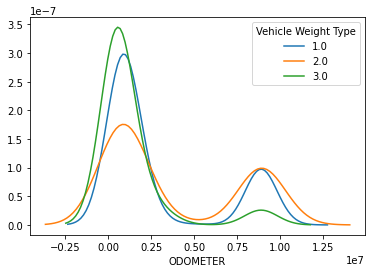

In [21]:
# more than 400000
for x in sorted(df_subset['GVW_TYPE'].unique()):
  cat_mask=(df_subset['GVW_TYPE']==x) & (df_subset['ODOMETER']>400000)
  cat=df_subset[cat_mask]
  sns.distplot(cat['ODOMETER'], hist=False, kde=True, label=x)
plt.legend(title='Vehicle Weight Type')
plt.show()

#### Odometer and Car Age

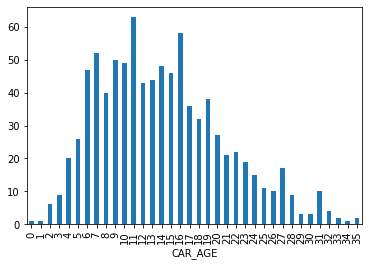

In [22]:
df_subset[df_subset.ODOMETER >= 400000].groupby('CAR_AGE').size().plot.bar()

#### Odometer and Vehicle Type

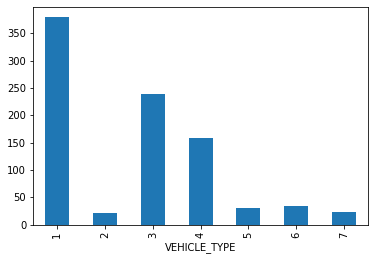

In [23]:
df_subset[df_subset["ODOMETER"]>400000].groupby("VEHICLE_TYPE").size().plot.bar()

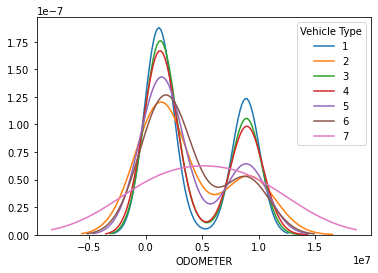

In [24]:
for x in sorted(df_subset['VEHICLE_TYPE'].unique()):
  cat_mask=(df_subset['VEHICLE_TYPE']==x) & (df_subset['ODOMETER']>800000)
  cat=df_subset[cat_mask]
  sns.distplot(cat['ODOMETER'], hist=False, kde=True, label=x)
plt.legend(title='Vehicle Type')
plt.show()